In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv('monthly-sunspots.csv')

In [54]:
scaler = MinMaxScaler(feature_range=(0, 1))
sunspots_normalized = scaler.fit_transform(df['Sunspots'].values.reshape(-1, 1))

def create_sequences(data, sequence_length):
    sequences = []
    target = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        target.append(data[i + sequence_length])
    return np.array(sequences), np.array(target)

sequence_length = 12
X, y = create_sequences(sunspots_normalized, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2246, 12, 1), (562, 12, 1), (2246, 1), (562, 1))

In [23]:
sunspots_normalized

array([[0.2285264 ],
       [0.24665091],
       [0.27580772],
       ...,
       [0.21985816],
       [0.13120567],
       [0.13159968]])

# Desarrollo de la RNN

In [60]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(12, 1)), # RNN layer with 64 units
    SimpleRNN(32),                                             # RNN layer with 32 units
    Dense(1, activation='linear')     
])                     

model.compile(loss='mse', optimizer='adam', metrics=["accuracy"])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_28 (SimpleRNN)   (None, 12, 64)            4224      
                                                                 
 simple_rnn_29 (SimpleRNN)   (None, 32)                3104      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,361
Trainable params: 7,361
Non-trainable params: 0
_________________________________________________________________


# Entrenar la RNN

In [61]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
57/57 [==============================] - 5s 20ms/step - loss: 0.0225 - accuracy: 0.0256 - val_loss: 0.0052 - val_accuracy: 0.0200
Epoch 2/50
57/57 [==============================] - 1s 11ms/step - loss: 0.0047 - accuracy: 0.0256 - val_loss: 0.0036 - val_accuracy: 0.0200
Epoch 3/50
57/57 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.0256 - val_loss: 0.0042 - val_accuracy: 0.0200
Epoch 4/50
57/57 [==============================] - 0s 9ms/step - loss: 0.0043 - accuracy: 0.0256 - val_loss: 0.0036 - val_accuracy: 0.0200
Epoch 5/50
57/57 [==============================] - 0s 8ms/step - loss: 0.0042 - accuracy: 0.0256 - val_loss: 0.0034 - val_accuracy: 0.0200
Epoch 6/50
57/57 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.0256 - val_loss: 0.0033 - val_accuracy: 0.0200
Epoch 7/50
57/57 [==============================] - 0s 8ms/step - loss: 0.0045 - accuracy: 0.0256 - val_loss: 0.0033 - val_accuracy: 0.0200
Epoch 8/50
57/57

# Probar la RNN

In [59]:
loss_rnn = model.evaluate(X_test, y_test)
print('MSE:', loss_rnn)

18/18 [==============================] - 0s 5ms/step - loss: 0.0042 - MSE: 0.0042
MSE: [0.004172189626842737, 0.004172189626842737]


# Precicciones de la RNN

In [27]:
predictions = model.predict(X_test)
predictions_original_scale = scaler.inverse_transform(predictions)

18/18 [==============================] - 0s 4ms/step


# Plotting Results

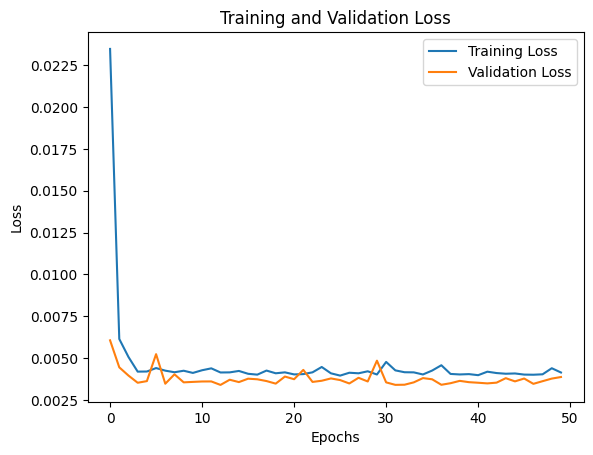

In [28]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

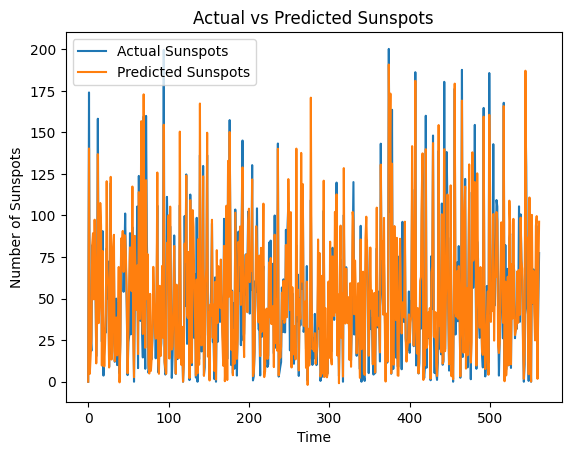

In [29]:
y_test_original_scale = scaler.inverse_transform(y_test)

plt.plot(y_test_original_scale, label='Actual Sunspots')
plt.plot(predictions_original_scale, label='Predicted Sunspots')
plt.xlabel('Time')
plt.ylabel('Number of Sunspots')
plt.title('Actual vs Predicted Sunspots')
plt.legend()
plt.show()

1/1 [==============================] - 0s 30ms/step


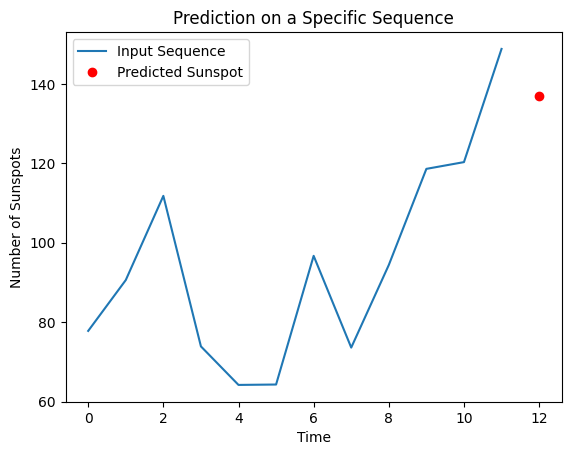

In [31]:
sequence_number = 12
sequence_prediction = model.predict(X_test[sequence_number].reshape(1, 12, 1))
sequence_prediction_original_scale = scaler.inverse_transform(sequence_prediction)
input_sequence_original_scale = scaler.inverse_transform(X_test[sequence_number])

plt.plot(input_sequence_original_scale, label='Input Sequence')
plt.plot([12], sequence_prediction_original_scale, 'ro', label='Predicted Sunspot')
plt.xlabel('Time')
plt.ylabel('Number of Sunspots')
plt.title('Prediction on a Specific Sequence')
plt.legend()
plt.show()